# KNN Classification

###  Creating a KNN model manually (Without using scikit-learn) 

In [ ]:
import numpy as np 
from collections import Counter
import pandas as pd

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist

def knn_predict(dataset, labels, test, k):
    distance = []
    for i in range (len(dataset)):
        dist = euclidean_distance(dataset[i], test)
        distance.append((dist, labels[i]))
    distance.sort(key=lambda x: x[0])
    neighbours = distance[:k]
    labels_only = [label for _,label in neighbours]
    return Counter(labels_only).most_common(1)[0][0]

df = pd.read_json(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\Data\Student Performance.json")
print(df)
print()
prediction = knn_predict(df['training_data'].tolist(), df['training_labels'].tolist(), [3, 5], 1)
print(prediction)


### Using Scikit-learn

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\Data\diabetes.csv")
# Replace Zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.nan)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.nan, mean)
    
# Split dataset
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Feature Scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Define the model
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
classifier.fit(x_train, y_train)

# Predict the test set results
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#### Iris dataset

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

data = load_iris()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)
prediction = model.predict(x_test)

accuracy = model.score(x_test, y_test)
print(y_test)


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


## Practice Problems 

#### Classify "Pass" or "Fail"

In [4]:
# Load the data
data = pd.DataFrame({
    'hours_studied': [2, 1, 3, 4, 5],
    'hours_slept': [9, 5, 6, 8, 5],
    'label': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass']
})

# Train the model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(data[['hours_studied', 'hours_slept']], data['label'])

# Make a prediction
prediction = model.predict([[3, 7]])    # Predict method expects a 2D array-like input, where each row represents a single sample.
accuracy = model.score([[3, 12]], ['Pass'])
print(prediction)

['Pass']


#### You’re analyzing data from a marketing campaign. Each row has the following features:
- Age
- Monthly Income (in thousands ₹)
- Time spent on product website (in minutes)
- Label: "Buy" or "NoBuy"


In [6]:
# Load Data
training_data = [
    [22, 12, 15],
    [25, 18, 25],
    [27, 25, 35],
    [30, 28, 45],
    [35, 30, 20],
    [40, 35, 30],
    [45, 40, 50],
    [38, 36, 22],
    [29, 22, 38],
    [26, 16, 26]
]

training_labels = [
    "NoBuy",
    "NoBuy",
    "Buy",
    "Buy",
    "NoBuy",
    "Buy",
    "Buy",
    "NoBuy",
    "Buy",
    "NoBuy"
]

test_point = [28, 18, 32]

# Making Dataframe 
data = pd.DataFrame(training_data, columns=['Age', 'Income', 'Time on Site'])
data['Label'] = training_labels

model = KNeighborsClassifier(n_neighbors=2)
model.fit(training_data, training_labels)

prediction = model.predict([test_point])
accuracy = model.score([test_point], ['NoBuy'])
print(prediction)

['Buy']


# KNN Regression 

### Learn using synthetic dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
x, y = make_regression(n_samples=200, n_features = 1, noise = 0.1, random_state = 42)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)       # Splits the datasets into training sets (x_train, y_train) and test sets (x_test, y_test)
knn_regressor = KNeighborsRegressor(n_neighbors=5)     # Looks at 5 nearest neighbors

knn_regressor.fit(x_train, y_train)     # Fits the model with the training datasets
y_pred = knn_regressor.predict(x_test)      # Tests the model with testing datasets (x_test)

mse = mean_squared_error(y_test, y_pred)    # Calculates the average of the squares of the errors between the predicted value (y_predict) & actual output (y_test)
# - A lower MSE means your model is doing a better job.

r2 = r2_score(y_test, y_pred)   
print(mse)
print(r2)

133.62045142000457
0.9817384115764595


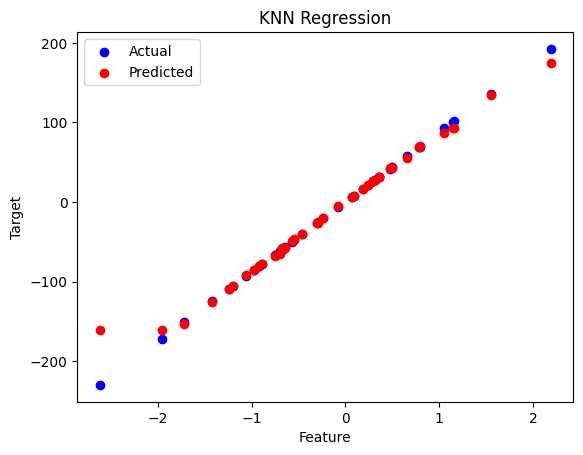

In [10]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.title('KNN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

### 🚀 A Simple KNN Regression Project Idea: "Predict Laptop Prices Based on Specs"
